In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os

In [2]:
books=pd.read_csv("books.csv")

ratings=pd.read_csv("Ratings.csv")

to_read=pd.read_csv("to_read.csv")


In [4]:
books.head()

,Unnamed: 0,ISBN,book_id,Publication Year,Author,Title,AvgRating,Image-URL,Image-URL-S
0,0,0195153448,1,2008,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",4.34,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,1,0002005018,2,1997,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4.44,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,2,0060973129,3,2005,Stephenie Meyer,"Twilight (Twilight, #1)",3.57,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,3,0374157065,4,1960,Harper Lee,To Kill a Mockingbird,4.25,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,4,0393045218,5,1925,F. Scott Fitzgerald,The Great Gatsby,3.89,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [6]:
books.shape

(10000, 9)

In [7]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [8]:
ratings.shape

(981756, 3)

In [9]:
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [10]:
to_read.shape

(912705, 2)

DATA PREPROCESSING

In [11]:
books.isna().sum()

Unnamed: 0          0
ISBN                0
book_id             0
Publication Year    0
Author              0
Title               0
AvgRating           0
Image-URL           0
Image-URL-S         0
dtype: int64

In [12]:
ratings.isna().sum()

book_id    0
user_id    0
rating     0
dtype: int64

In [13]:
to_read.isna().sum()

user_id    0
book_id    0
dtype: int64

EDA

In [15]:
books.describe() 

,Unnamed: 0,book_id,Publication Year,AvgRating
count,10000.00000,10000.00000,10000.000000,10000.000000
mean,4999.50000,5000.50000,1989.459700,4.002191
std,2886.89568,2886.89568,63.416135,0.254427
min,0.00000,1.00000,8.000000,2.470000
25%,2499.75000,2500.75000,1990.000000,3.850000
50%,4999.50000,5000.50000,2004.000000,4.020000
75%,7499.25000,7500.25000,2011.000000,4.180000
max,9999.00000,10000.00000,2017.000000,4.820000


In [16]:
ratings.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


In [17]:
to_read.describe()

,user_id,book_id
count,912705.000000,912705.000000
mean,27668.980115,2454.739538
std,14775.096388,2626.359921
min,1.000000,1.000000
25%,15507.000000,360.000000
50%,27799.000000,1381.000000
75%,40220.000000,3843.000000
max,53424.000000,10000.000000


[]

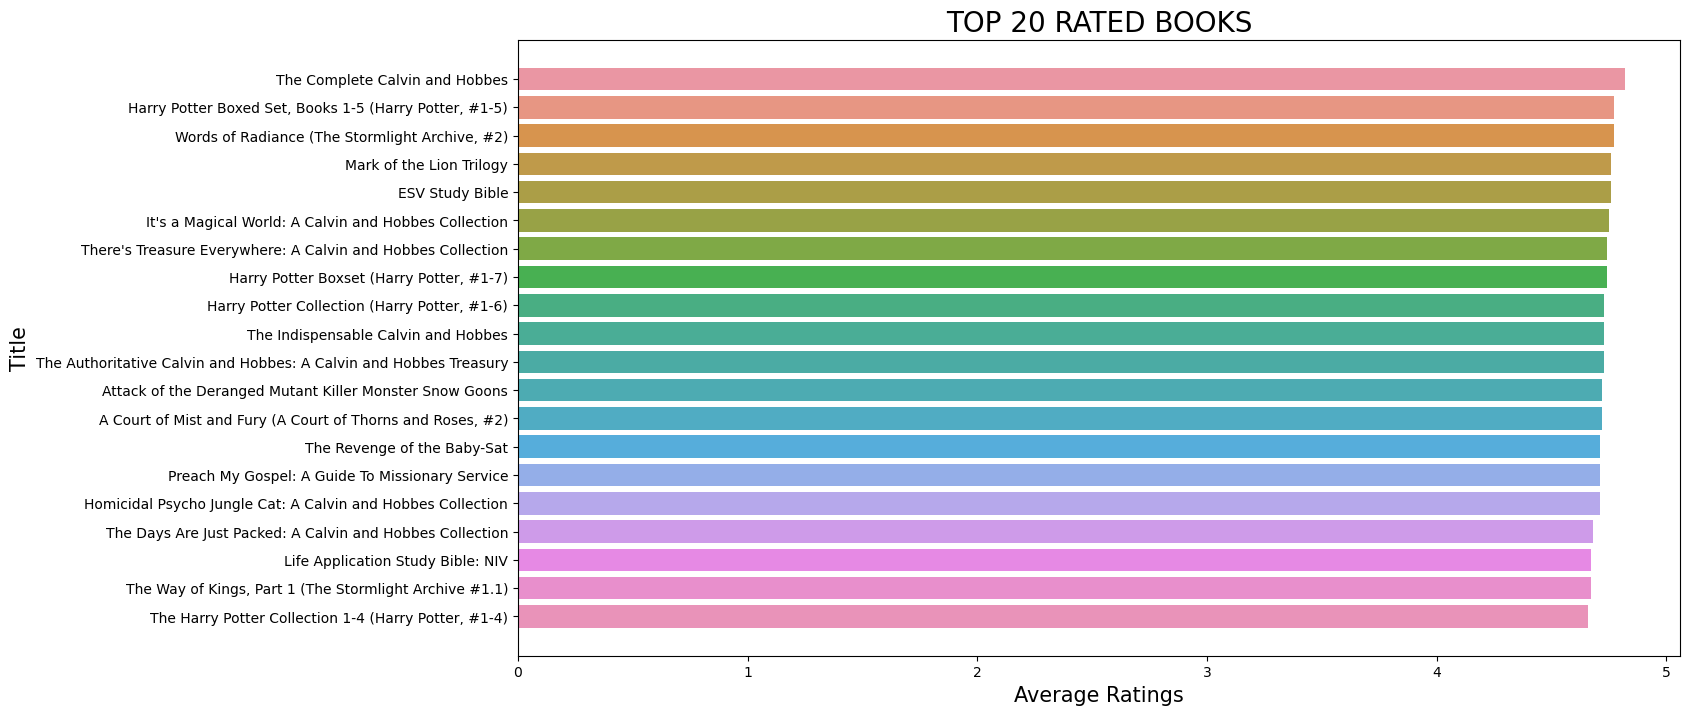

In [18]:
top_rated=books.sort_values('AvgRating',ascending=False)

top_rated=top_rated[:20]

plt.figure(figsize=(15,8))

sns.barplot(data=top_rated,y='Title',x='AvgRating')

plt.ylabel('Title',fontsize=15)

plt.xlabel('Average Ratings',fontsize=15) 

plt.title("TOP 20 RATED BOOKS",fontsize=20)

plt.plot()



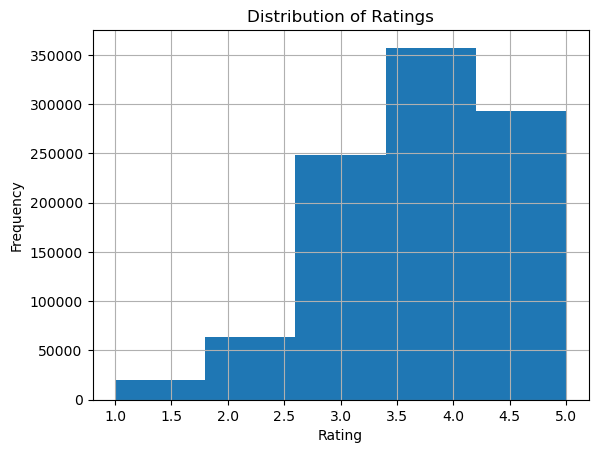

In [20]:
# Distribution of ratings
import matplotlib.pyplot as plt
ratings['rating'].hist(bins=5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

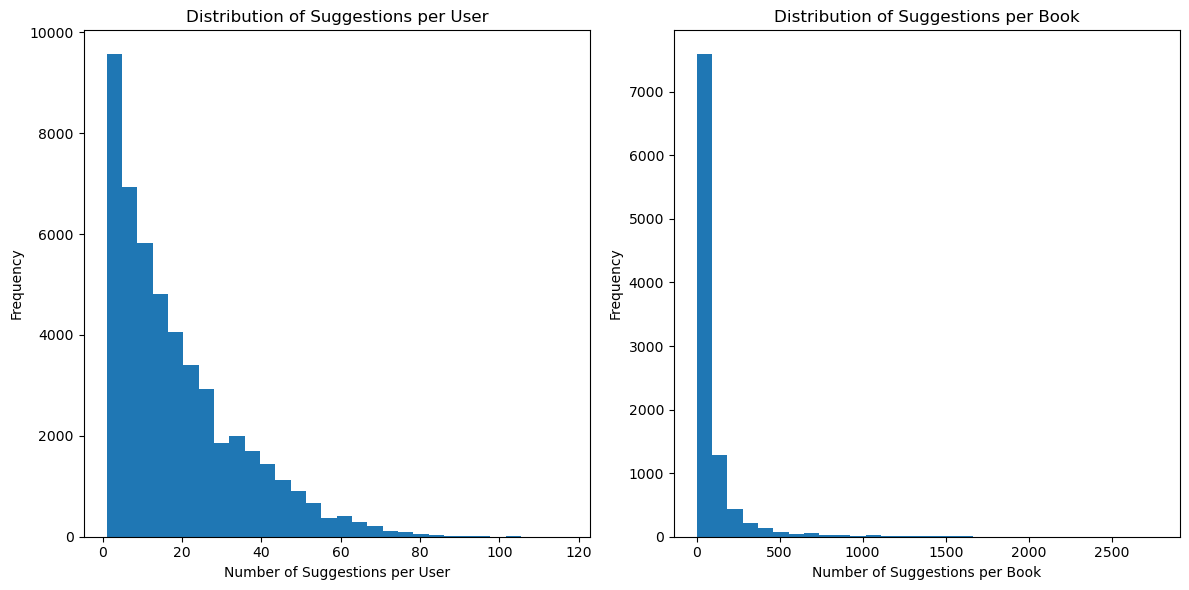

In [21]:
# Distribution of user suggestions 
user_counts = to_read['user_id'].value_counts()
book_counts = to_read['book_id'].value_counts()

# Plot distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
user_counts.plot(kind='hist', bins=30)
plt.xlabel('Number of Suggestions per User')
plt.title('Distribution of Suggestions per User')

plt.subplot(1, 2, 2)
book_counts.plot(kind='hist', bins=30)
plt.xlabel('Number of Suggestions per Book')
plt.title('Distribution of Suggestions per Book')

plt.tight_layout()
plt.show()

In [23]:
# Merge book details with ratings
df_books_ratings = pd.merge(books,ratings, on='book_id', how='left')

# Correlation between average rating and user rating
correlation = df_books_ratings[['AvgRating', 'rating']].corr()
print(correlation)

           AvgRating    rating
AvgRating   1.000000  0.269939
rating      0.269939  1.000000


In [26]:
top_books = df_books_ratings.groupby('Title').agg({'rating': 'mean', 'book_id': 'count'}).sort_values(by='rating', ascending=False)
print(top_books.head(10))


                                                      rating  book_id
Title                                                                
ESV Study Bible                                     4.820225       89
The Days Are Just Packed: A Calvin and Hobbes C...  4.780000      100
The Indispensable Calvin and Hobbes                 4.780000      100
Attack of the Deranged Mutant Killer Monster Sn...  4.777778       99
The Divan                                           4.774194       93
There's Treasure Everywhere: A Calvin and Hobbe...  4.770000      100
Harry Potter Boxed Set, Books 1-5 (Harry Potter...  4.770000      100
The Authoritative Calvin and Hobbes: A Calvin a...  4.750000      100
It's a Magical World: A Calvin and Hobbes Colle...  4.750000      100
The Calvin and Hobbes Lazy Sunday Book              4.750000      100


In [27]:

# Load the ratings dataset
#df_ratings = pd.read_csv('ratings.csv')  # Ensure this file has columns: book_id, user_id, rating

# Count the number of ratings for each book_id
ratings_count = ratings.groupby('book_id').size().reset_index(name='num_ratings')

# Print the result
print(ratings_count)


      book_id  num_ratings
0           1          100
1           2          100
2           3          100
3           4          100
4           5          100
...       ...          ...
9995     9996           98
9996     9997           89
9997     9998           95
9998     9999           99
9999    10000           96

[10000 rows x 2 columns]


In [106]:
# Merge the ratings count with the Books dataset based on book_id
popular_df_ = pd.merge(books, ratings_count, on='book_id', how='left')

# Fill NaN values with 0 (in case some books have no ratings)
popular_df['num_ratings'] = popular_df['num_ratings'].fillna(0).astype(int)

# Print the result
popular_df

,Unnamed: 0,ISBN,book_id,Publication Year,Author,Title,AvgRating,Image-URL,Image-URL-S,num_ratings
0,0,0195153448,1,2008,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",4.34,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,100
1,1,0002005018,2,1997,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4.44,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,100
2,2,0060973129,3,2005,Stephenie Meyer,"Twilight (Twilight, #1)",3.57,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,100
3,3,0374157065,4,1960,Harper Lee,To Kill a Mockingbird,4.25,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,100
4,4,0393045218,5,1925,F. Scott Fitzgerald,The Great Gatsby,3.89,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,100
...,...,...,...,...,...,...,...,...,...,...
9995,9995,0380730774,9996,2010,Ilona Andrews,"Bayou Moon (The Edge, #2)",4.09,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...,98
9996,9996,0862418879,9997,1990,Robert A. Caro,"Means of Ascent (The Years of Lyndon Johnson, #2)",4.25,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,89
9997,9997,340414645X,9998,1977,Patrick O'Brian,The Mauritius Command,4.35,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...,95
9998,9998,3442730988,9999,2011,Peggy Orenstein,Cinderella Ate My Daughter: Dispatches from th...,3.65,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...,99


In [107]:
popular_df_sorted = popular_df.sort_values(by='num_ratings', ascending=False)
popular_df_sorted=popular_df_sorted.head(50)

In [108]:
columns=['Title','Author','Publication Year','Image-URL']

popular_df_final=popular_df_sorted[columns]
popular_df_final

,Title,Author,Publication Year,Image-URL
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,2008,https://images.gr-assets.com/books/1447303603m...
5197,Of Love and Shadows,"Isabel Allende, Margaret Sayers Peden",1984,https://s.gr-assets.com/assets/nophoto/book/11...
5214,Plan B: Further Thoughts on Faith,Anne Lamott,2004,https://s.gr-assets.com/assets/nophoto/book/11...
5213,"The Archer's Tale (The Grail Quest, #1)",Bernard Cornwell,2000,https://images.gr-assets.com/books/1407709312m...
9802,The Berenstain Bears and Too Much TV,"Stan Berenstain, Jan Berenstain",1984,https://images.gr-assets.com/books/1457297865m...
5210,Pay It Forward,Catherine Ryan Hyde,1999,https://s.gr-assets.com/assets/nophoto/book/11...
5209,Discipline and Punish: The Birth of the Prison,"Michel Foucault, Alan Sheridan, Thomas Mathies...",1975,https://images.gr-assets.com/books/1400737037m...
5208,"Odd Apocalypse (Odd Thomas, #5)",Dean Koontz,2012,https://s.gr-assets.com/assets/nophoto/book/11...
5206,The Days Are Just Packed: A Calvin and Hobbes ...,Bill Watterson,1993,https://images.gr-assets.com/books/1418211162m...
5205,Sick Puppy,Carl Hiaasen,2000,https://s.gr-assets.com/assets/nophoto/book/11...


In [109]:
import pickle
pickle.dump(popular_df_final,open('popular_final.pkl','wb'))
